<a href="https://colab.research.google.com/github/rohan4b/Encheres/blob/master/Rohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading data

In [ ]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [ ]:
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [ ]:
x = x.reshape(70000, 28, 28)

In [ ]:
x.shape, y.shape

((70000, 28, 28), (70000,))

# breaking into train and test

In [ ]:
def data_split(x, y, split_size = 0.2):
  data = [x, y]
  random.shuffle(data)

  split = int(len(data[0]) * (1 - split_size))
  train_x, test_x, train_y, test_y = data[0][:split], data[0][split:], data[1][:split], data[1][split:] 
  return train_x, test_x, train_y, test_y

In [ ]:
train_x, test_x, train_y, test_y = data_split(x, y)

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((56000, 28, 28), (14000, 28, 28), (56000,), (14000,))

# visualizing the distribution of training data

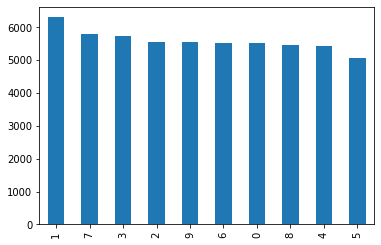

In [ ]:
pd.Series(train_y).value_counts().plot.bar()

# the classes are almost balanced i.e evenly distributed

# segregating as per the classes

In [ ]:
# making blocks of images for every class

data_dict = defaultdict(list)
for img, id in zip(train_x, train_y):
  data_dict[int(id)].append(img)

# calculating mean and standard deviation images (PART 1)

In [ ]:
def plotter(images=None):
  plt.subplot(121)
  plt.imshow(images[0].reshape(28,28))
  plt.subplot(122)
  plt.imshow(images[1].reshape(28,28))

class name : 0
mean image 			 std image


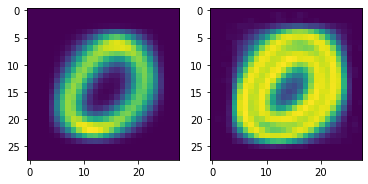

----------------------------------------------------------------------------------------------
class name : 1
mean image 			 std image


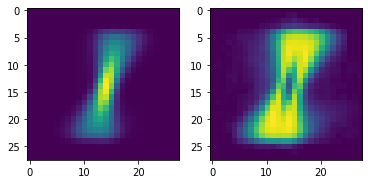

----------------------------------------------------------------------------------------------
class name : 2
mean image 			 std image


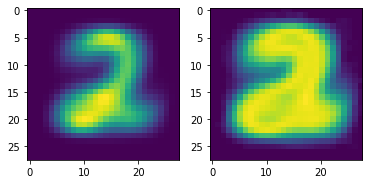

----------------------------------------------------------------------------------------------
class name : 3
mean image 			 std image


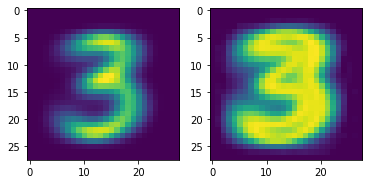

----------------------------------------------------------------------------------------------
class name : 4
mean image 			 std image


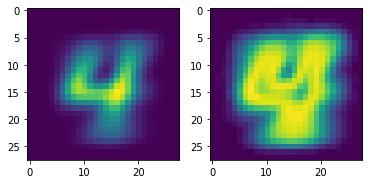

----------------------------------------------------------------------------------------------
class name : 5
mean image 			 std image


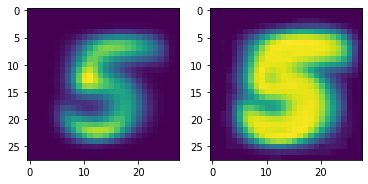

----------------------------------------------------------------------------------------------
class name : 6
mean image 			 std image


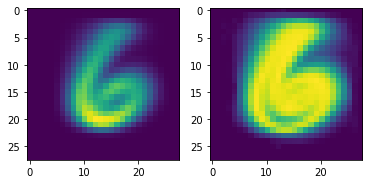

----------------------------------------------------------------------------------------------
class name : 7
mean image 			 std image


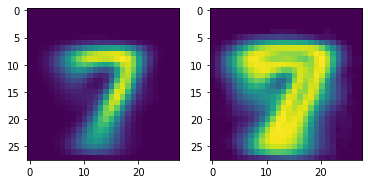

----------------------------------------------------------------------------------------------
class name : 8
mean image 			 std image


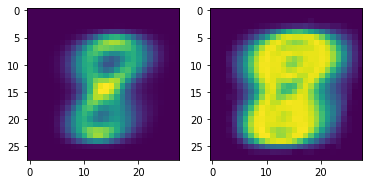

----------------------------------------------------------------------------------------------
class name : 9
mean image 			 std image


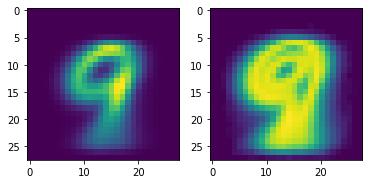

----------------------------------------------------------------------------------------------


In [ ]:
mean_std_dict = {}
for id in range(10):
  print('class name :', id)
  blank_img = np.zeros((28, 28))
  for each_img in data_dict[id]:
    for r in range(len(each_img)):
      for c in range(len(each_img)):
        blank_img[r][c] += each_img[r][c]

  mean_img = blank_img / len(data_dict[id])     # mean = sum(X)/N
                                                # var = sum((x[i] - x')**2)/N
  blank_img = np.zeros((28, 28))
  for each_img in data_dict[id]:
    for r in range(len(each_img)):
      for c in range(len(each_img)):
        blank_img[r][c] += (each_img[r][c] - mean_img[r][c])**2     
  
  var_img = blank_img / len(data_dict[id])
  std_img = np.sqrt(var_img)                  # std = root(var)  
  mean_std_dict[id] = [mean_img, std_img]
  print('mean image \t\t\t std image')
  plotter([mean_img, std_img])
  plt.show()
  print('----------------------------------------------------------------------------------------------')

# discriminant calculation (PART 2)

In [ ]:
def discriminant(test_img):
  sum_val = 10**10
  closest_class = -1
  for id in mean_std_dict:
    mean_class_img, std_class_img = mean_std_dict[id]

    # calculating difference in mean pattern and test pattern
    mean_diff = np.abs(test_img - mean_class_img)
    # difference between standard_deviation and difference between test and mean pattern
    std_diff = np.abs(mean_diff - std_class_img)

    # low value represents less noise, which could only happen if the test image almost coincides with general class mean and deviation
    curr_sum = np.sum(std_diff)

    if sum_val > curr_sum:
      sum_val = curr_sum
      closest_class = id
  return closest_class

In [ ]:
predictions = []
for i in range(len(test_x)):
  pred = discriminant(test_x[i])
  predictions.append(str(pred))

# metrics

In [ ]:
def get_confusion_matrix(y_true, y_preds):
  actuals =len(np.unique(y_true))
  matrix = np.zeros((actuals, actuals), np.int)

  for t, p in zip(y_true, y_preds):
    t = int(t)
    p = int(p)
    matrix[t][p] += 1

  return matrix

In [ ]:
def get_metric(preds, tests):
  metric_dict = {str(k):{'tp' : 0, 'fp' : 0, 'fn' : 0, 'tn' : 0} for k in range(10)}

  for c in range(10):
    c = str(c)
    for p, t in zip(preds, tests):
      if (p == c) and (t == c):
        metric_dict[c]['tp'] += 1

      elif p != c and t != c:
        metric_dict[c]['tn'] += 1

      elif p == c and t != c:
        metric_dict[c]['fp'] += 1

      elif p != c and t == c:
        metric_dict[c]['fn'] += 1

  matrix = get_confusion_matrix(tests, preds)
  accuracy = matrix.diagonal()/matrix.sum(axis=1)

  print('Confusion Matrix')
  print(matrix)
  print('\n----------------------------------\n')

  print('Metric per class')
  print("class \tprecision   recall  \tfscore \t \taccuracy")
  total = 0
  for c in metric_dict:
    prec = metric_dict[c]['tp'] / (metric_dict[c]['tp'] + metric_dict[c]['fp'])
    recall = metric_dict[c]['tp'] / (metric_dict[c]['tp'] + metric_dict[c]['fn'])
    f1_score = (2 * prec * recall) / (prec + recall)
    acc = accuracy[int(c)]
    total += acc

    print(c, '->\t', f'{str(prec)[:4]} \t   {str(recall)[:4]} \t   {str(f1_score)[:4]} \t   {str(acc)[:4]}')
  
  print('\n----------------------------------\n')
  
  print('Total Accuracy')
  print(total/10)

get_metric(predictions, test_y)

Confusion Matrix
[[1318    2    0    0    0    6   16    0   26    5]
 [   0 1523    1    0    0    0    6    0   39    0]
 [  92  123  785    6    0    3  121    3  279   18]
 [  47  106   24  772    0   27   29    2  382   24]
 [  33   76    2    1  233   12   74    1  153  791]
 [ 161  129    4   46    0  366   39    0  452   56]
 [  45   48    5    0    1    5 1206    0   29    0]
 [  38  139    6    2    0    4    3  529  102  660]
 [  29  164    2    5    1    1   15    2 1109   37]
 [  37   72    1    2    2    4    3    0   89 1189]]

----------------------------------

Metric per class
class 	precision   recall  	fscore 	 	accuracy
0 ->	 0.73 	   0.95 	   0.83 	   0.95
1 ->	 0.63 	   0.97 	   0.77 	   0.97
2 ->	 0.94 	   0.54 	   0.69 	   0.54
3 ->	 0.92 	   0.54 	   0.68 	   0.54
4 ->	 0.98 	   0.16 	   0.28 	   0.16
5 ->	 0.85 	   0.29 	   0.43 	   0.29
6 ->	 0.79 	   0.90 	   0.84 	   0.90
7 ->	 0.98 	   0.35 	   0.52 	   0.35
8 ->	 0.41 	   0.81 	   0.55 	   0.81
9 ->	 0.4

In [ ]:
'''
# there are certain disadvantages of bayseian method for pattern recognition which makes it less efficient than other methods. They are : 

  1.The main limitation of Naive Bayes is the assumption of independent predictor features. 
    Naive Bayes implicitly assumes that all the attributes are mutually independent. 
    In real life, it’s almost impossible that we get a set of predictors that are completely independent or one another.

  2.If a categorical variable has a category in the test dataset, which was not observed in training dataset,
    then the model will assign a 0 (zero) probability and will be unable to make a prediction.
    This is often known as Zero Frequency. To solve this, we can use a smoothing technique.
    
'''